In [1]:
import os
import pandas as pd
for root,dirs,files in os.walk('./qcsv'):
    for file in files[:1]:
        symbol=file.split('.')[0]
        df=pd.read_csv('./qcsv/'+symbol+'.csv',index_col=0)
        df['symbol']=symbol
        df['date']=pd.to_datetime(df['date'])
        print(df)

           date  open  close  high   low   volume        amount  swing  \
0    2015-01-05  4.60   4.89  5.02  4.54  8312544  4.274376e+09  10.48   
1    2015-01-06  4.79   4.80  4.88  4.68  5634697  2.905527e+09   4.09   
2    2015-01-07  4.74   4.99  5.03  4.72  6156267  3.246406e+09   6.46   
3    2015-01-08  5.01   4.67  5.01  4.65  5486685  2.829286e+09   7.21   
4    2015-01-09  4.63   4.61  4.85  4.60  5149009  2.617789e+09   5.35   
...         ...   ...    ...   ...   ...      ...           ...    ...   
1662 2022-03-24  3.52   3.54  3.61  3.50  1118599  3.973331e+08   3.11   
1663 2022-03-25  3.53   3.51  3.54  3.50   742411  2.614483e+08   1.13   
1664 2022-03-28  3.49   3.54  3.56  3.45   914175  3.203564e+08   3.13   
1665 2022-03-29  3.55   3.53  3.56  3.52   470735  1.664713e+08   1.13   
1666 2022-03-30  3.54   3.55  3.56  3.52   705496  2.499794e+08   1.13   

      chg_pct  chg_amount  ...   MAX  MAXINDEX   MIN  MININDEX  MINIDX  \
0        6.77        0.31  ...   NaN 

In [3]:
import os
import pandas as pd
import alphalens
from alphalens.utils import get_clean_factor_and_forward_returns
from alphalens.tears import create_full_tear_sheet
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=RuntimeWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

df_all=pd.DataFrame()
path="./qcsv/"
for root,dirs,files in os.walk(path):
    for file in files[:100]:
        symbol=file.split('.')[0]
        df=pd.read_csv(path+symbol+'.csv',index_col=0)
        df['symbol']=symbol
        df['date']=pd.to_datetime(df['date'])
        df_all=df_all.append(df,ignore_index=True)

 
        
        
price = df_all.pivot_table(index='date', columns='symbol', values='close')        
df_all.index=df_all['date']
price.index = pd.to_datetime(price.index)
assets = df_all.set_index( [df_all.index,df_all['symbol']], drop=True,append=False, inplace=False)

# # print(len(assets))
# # print(assets)
ret = get_clean_factor_and_forward_returns(assets['volume'],price,periods=[10],quantiles=None,bins=10,max_loss=1,groupby=None)
sheet=alphalens.tears.create_full_tear_sheet(ret)

Dropped 0.7% entries from factor data: 0.7% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 100.0%, not exceeded: OK!
Quantiles Statistics


,min,max,mean,std,count,count %
factor_quantile,,,,,,
1,7,5079918,2.266622e+05,2.758517e+05,112133,79.693685
2,97146,9432153,9.872588e+05,7.856217e+05,14208,10.097722
3,185226,13534986,1.646138e+06,1.407161e+06,5574,3.961480
4,268039,16542931,2.333872e+06,1.964154e+06,2811,1.997797
5,395115,19938945,2.823808e+06,2.294238e+06,1578,1.121495
6,449165,21567829,3.606149e+06,2.925952e+06,985,0.700046
7,615010,19998692,3.943014e+06,2.963511e+06,650,0.461959
8,668263,21078386,4.685769e+06,3.577250e+06,430,0.305604
9,754352,23381800,5.041500e+06,3.491463e+06,331,0.235244


KeyboardInterrupt: 

<Figure size 432x288 with 0 Axes>

In [13]:
ic=alphalens.performance.factor_information_coefficient(ret)
ic10d=ic['10D']
ic10d_mean=ic10d.mean()
ic10d_std=ic10d.std()
ic10d_adjusted=ic10d_mean/ic10d_std
print(ic10d_mean)
print(ic10d_std)
print(ic10d_adjusted)

-0.01709827604844051
0.21514387239001337
-0.07947368362620486


In [25]:
ic_list=[]
for factor in df.columns[12:]:
    try:
        print(factor)
        ret = get_clean_factor_and_forward_returns(assets[factor],price,periods=[10],quantiles=None,bins=10,max_loss=1,groupby=None)
        ic=alphalens.performance.factor_information_coefficient(ret)
        ic=ic['10D']
        ic_mean=ic.mean()
        ic_std=ic.std()
        ir=ic_mean/ic_std
        ic_list.append({'factor':factor,'ic':ic_mean,'ir':ir})
        ic_df=pd.DataFrame(ic_list)    
    except:
        pass
ic_df


UPPER
Dropped 7.0% entries from factor data: 7.0% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 100.0%, not exceeded: OK!
MIDDLE
Dropped 7.0% entries from factor data: 7.0% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 100.0%, not exceeded: OK!
LOWER
Dropped 7.0% entries from factor data: 7.0% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 100.0%, not exceeded: OK!
DEMA
Dropped 13.2% entries from factor data: 13.2% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 100.0%, not exceeded: OK!
EMA90
Dropped 7.0% entries from factor data: 7.0% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 100.

MINUS-DM
Dropped 7.0% entries from factor data: 7.0% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 100.0%, not exceeded: OK!
MOM
Dropped 7.1% entries from factor data: 7.1% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 100.0%, not exceeded: OK!
PLUS-DI
Dropped 7.1% entries from factor data: 7.1% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 100.0%, not exceeded: OK!
PLUS-DM
Dropped 7.0% entries from factor data: 7.0% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 100.0%, not exceeded: OK!
PPO
Dropped 7.0% entries from factor data: 7.0% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 100

LINEARREG-SLOPE
Dropped 7.0% entries from factor data: 7.0% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 100.0%, not exceeded: OK!
STDDEV
Dropped 7.0% entries from factor data: 7.0% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 100.0%, not exceeded: OK!
TSF
Dropped 7.0% entries from factor data: 7.0% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 100.0%, not exceeded: OK!
VAR
Dropped 7.0% entries from factor data: 7.0% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 100.0%, not exceeded: OK!
ACOS
Dropped 100.0% entries from factor data: 100.0% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss

,factor,ic,ir
0,UPPER,0.018223,0.070991
1,MIDDLE,0.017141,0.067531
2,LOWER,0.014510,0.057887
3,DEMA,0.019872,0.076437
4,EMA90,0.016725,0.065844
...,...,...,...
105,MINIDX,0.015438,0.100577
106,MAXIDX,0.016123,0.108360
107,MULT,0.007353,0.028966
108,SUB,0.003992,0.015515


In [85]:
ic_df['ic']=abs(ic_df['ic'])
ic_df['ir']=abs(ic_df['ir'])
ic_df=ic_df.sort_values(by=['ir','ic'],ascending=False) 
ic_df

,factor,ic,ir
60,OBV,0.053776,0.234068
15,T3,0.042063,0.153059
76,CORREL,0.029773,0.148487
55,TRIX,0.036735,0.147415
75,BETA,0.025654,0.141117
...,...,...,...
47,ROCR100,0.000190,0.000840
45,ROC,0.000189,0.000840
59,ADOSC,0.000132,0.000720
84,ACOS,1.000000,NaN


In [71]:
import qlib
import pandas as pd
from qlib.constant import REG_CN
from qlib.utils import exists_qlib_data, init_instance_by_config
from qlib.workflow import R
from qlib.workflow.record_temp import SignalRecord, PortAnaRecord
from qlib.utils import flatten_dict
provider_uri = "/home/ubuntu/myquant/qbin"  # target_dir
qlib.init(provider_uri=provider_uri, region=REG_CN)
market = "all"
benchmark = "000001"

[29523:MainThread](2022-04-05 20:55:58,947) INFO - qlib.Initialization - [config.py:402] - default_conf: client.
[29523:MainThread](2022-04-05 20:55:58,951) INFO - qlib.Initialization - [__init__.py:74] - qlib successfully initialized based on client settings.
[29523:MainThread](2022-04-05 20:55:58,952) INFO - qlib.Initialization - [__init__.py:76] - data_path={'__DEFAULT_FREQ': PosixPath('/data/wwwroot/Notebook/qbin')}


In [99]:
###################################
# train model
###################################
import sys

data_handler_config = {
    "start_time": "2015-01-01",
    "end_time": "2022-03-30",
    "fit_start_time": "2015-01-01",
    "fit_end_time": "2020-12-31",
    "instruments": market,
}

task = {
    "model": {
        "class": "LGBModel",
        "module_path": "qlib.contrib.model.gbdt",
        "kwargs": {
            "loss": "mse",
            "colsample_bytree": 0.8879,
            "learning_rate": 0.0421,
            "subsample": 0.8789,
            "lambda_l1": 205.6999,
            "lambda_l2": 580.9768,
            "max_depth": 8,
            "num_leaves": 210,
            "num_threads": 20,
        },
    },
    "dataset": {
        "class": "DatasetH",
        "module_path": "qlib.data.dataset",
        "kwargs": {
            "handler": {
                "class": "finhackalpha",
                "module_path": 'finhackalpha.py',
                "kwargs": data_handler_config,
            },
            "segments": {
                "train": ("2015-01-01", "2018-12-31"),
                "valid": ("2019-01-01", "2019-12-31"),
                "test": ("2020-01-01", "2022-03-30"),
            },
        },
    },
}

# model initiaiton
model = init_instance_by_config(task["model"])
dataset = init_instance_by_config(task["dataset"])

# start exp to train model
with R.start(experiment_name="train_model"):
    R.log_params(**flatten_dict(task))
    model.fit(dataset)
    R.save_objects(trained_model=model)
    rid = R.get_recorder().id

total alphas:2


[29523:MainThread](2022-04-05 21:30:59,114) INFO - qlib.timer - [log.py:113] - Time cost: 2.390s | Loading data Done
[29523:MainThread](2022-04-05 21:30:59,115) INFO - qlib.timer - [log.py:113] - Time cost: 0.000s | fit & process data Done
[29523:MainThread](2022-04-05 21:30:59,116) INFO - qlib.timer - [log.py:113] - Time cost: 2.393s | Init data Done
[29523:MainThread](2022-04-05 21:30:59,118) INFO - qlib.workflow - [expm.py:315] - <mlflow.tracking.client.MlflowClient object at 0x7f18c0e13a90>
[29523:MainThread](2022-04-05 21:30:59,120) INFO - qlib.workflow - [exp.py:257] - Experiment 1 starts running ...
[29523:MainThread](2022-04-05 21:30:59,128) INFO - qlib.workflow - [recorder.py:293] - Recorder aa8a4121f181471d97bb4e1501cc58ca starts running under Experiment 1 ...


Training until validation scores don't improve for 50 rounds
[20]	train's l2: 0.0354498	valid's l2: 0.013724
[40]	train's l2: 0.0286271	valid's l2: 0.0127152
[60]	train's l2: 0.0271469	valid's l2: 0.0124235
[80]	train's l2: 0.0267866	valid's l2: 0.0123116
[100]	train's l2: 0.0266845	valid's l2: 0.0122628
[120]	train's l2: 0.0266439	valid's l2: 0.0122273
[140]	train's l2: 0.0266233	valid's l2: 0.0122059
[160]	train's l2: 0.0266114	valid's l2: 0.0121941
[180]	train's l2: 0.0266016	valid's l2: 0.0121884
[200]	train's l2: 0.0265955	valid's l2: 0.0121837
[220]	train's l2: 0.0265907	valid's l2: 0.0121795
[240]	train's l2: 0.0265875	valid's l2: 0.0121765
[260]	train's l2: 0.0265854	valid's l2: 0.0121739
[280]	train's l2: 0.026584	valid's l2: 0.012172
[300]	train's l2: 0.0265829	valid's l2: 0.0121704
[320]	train's l2: 0.0265821	valid's l2: 0.0121695
[340]	train's l2: 0.0265816	valid's l2: 0.0121685
[360]	train's l2: 0.0265811	valid's l2: 0.0121678
[380]	train's l2: 0.0265807	valid's l2: 0.0121

[29523:MainThread](2022-04-05 21:31:06,547) INFO - qlib.timer - [log.py:113] - Time cost: 1.239s | waiting `async_log` Done


In [100]:
###################################
# prediction, backtest & analysis
###################################
port_analysis_config = {
    "executor": {
        "class": "SimulatorExecutor",
        "module_path": "qlib.backtest.executor",
        "kwargs": {
            "time_per_step": "day",
            "generate_portfolio_metrics": True,
        },
    },
    "strategy": {
        "class": "TopkDropoutStrategy",
        "module_path": "qlib.contrib.strategy.signal_strategy",
        "kwargs": {
            "model": model,
            "dataset": dataset,
            "topk": 50,
            "n_drop": 10,
        },
    },
    "backtest": {
        "start_time": "2020-01-01",
        "end_time": "2022-03-01",
        "account": 100000000,
        "benchmark": benchmark,
        "exchange_kwargs": {
            "freq": "day",
            "limit_threshold": 0.095,
            "deal_price": "close",
            "open_cost": 0.0005,
            "close_cost": 0.0015,
            "min_cost": 5,
        },
    },
}

# backtest and analysis
with R.start(experiment_name="backtest_analysis"):
    recorder = R.get_recorder(recorder_id=rid, experiment_name="train_model")
    model = recorder.load_object("trained_model")

    # prediction
    recorder = R.get_recorder()
    ba_rid = recorder.id
    sr = SignalRecord(model, dataset, recorder)
    sr.generate()

    # backtest & analysis
    par = PortAnaRecord(recorder, port_analysis_config, "day")
    par.generate()


[29523:MainThread](2022-04-05 21:31:07,536) INFO - qlib.workflow - [expm.py:315] - <mlflow.tracking.client.MlflowClient object at 0x7f18649dc820>
[29523:MainThread](2022-04-05 21:31:07,540) INFO - qlib.workflow - [exp.py:257] - Experiment 2 starts running ...
[29523:MainThread](2022-04-05 21:31:07,546) INFO - qlib.workflow - [recorder.py:293] - Recorder 5f7f88c8933b44d68d8f857cb3cfadcc starts running under Experiment 2 ...
[29523:MainThread](2022-04-05 21:31:09,011) INFO - qlib.workflow - [record_temp.py:194] - Signal record 'pred.pkl' has been saved as the artifact of the Experiment 2
[29523:MainThread](2022-04-05 21:31:09,049) INFO - qlib.backtest caller - [__init__.py:83] - Create new exchange


'The following are prediction results of the LGBModel model.'
                          score
datetime   instrument          
2020-01-02 000001      0.992933
           000002      0.992933
           000063      0.989482
           000066      0.993903
           000069      0.991748


[29523:MainThread](2022-04-05 21:31:12,159) WARNING - qlib.BaseExecutor - [executor.py:111] - `common_infra` is not set for <qlib.backtest.executor.SimulatorExecutor object at 0x7f185ff5df40>


backtest loop:   0%|          | 0/522 [00:00<?, ?it/s]

[29523:MainThread](2022-04-05 21:31:21,831) INFO - qlib.workflow - [record_temp.py:499] - Portfolio analysis record 'port_analysis_1day.pkl' has been saved as the artifact of the Experiment 2
[29523:MainThread](2022-04-05 21:31:21,842) INFO - qlib.workflow - [record_temp.py:524] - Indicator analysis record 'indicator_analysis_1day.pkl' has been saved as the artifact of the Experiment 2
[29523:MainThread](2022-04-05 21:31:21,868) INFO - qlib.timer - [log.py:113] - Time cost: 0.006s | waiting `async_log` Done


'The following are analysis results of benchmark return(1day).'
                       risk
mean               0.000254
std                0.023289
annualized_return  0.060415
information_ratio  0.168149
max_drawdown      -0.417922
'The following are analysis results of the excess return without cost(1day).'
                       risk
mean               0.001705
std                0.020868
annualized_return  0.405679
information_ratio  1.260131
max_drawdown      -0.441866
'The following are analysis results of the excess return with cost(1day).'
                       risk
mean               0.001553
std                0.020862
annualized_return  0.369703
information_ratio  1.148711
max_drawdown      -0.468023
'The following are analysis results of indicators(1day).'
     value
ffr    1.0
pa     0.0
pos    0.0


In [227]:
from qlib.contrib.report import analysis_model, analysis_position
from qlib.data import D
recorder = R.get_recorder(recorder_id=ba_rid, experiment_name="backtest_analysis")
print(recorder)
pred_df = recorder.load_object("pred.pkl")
pred_df_dates = pred_df.index.get_level_values(level='datetime')
report_normal_df = recorder.load_object("portfolio_analysis/report_normal_1day.pkl")
positions = recorder.load_object("portfolio_analysis/positions_normal_1day.pkl")
analysis_df = recorder.load_object("portfolio_analysis/port_analysis_1day.pkl")


{'class': 'Recorder', 'id': '5f7f88c8933b44d68d8f857cb3cfadcc', 'name': 'mlflow_recorder', 'experiment_id': '2', 'start_time': '2022-04-05 21:31:07', 'end_time': '2022-04-05 21:31:21', 'status': 'FINISHED'}


In [228]:
report_normal_df

,account,return,total_turnover,turnover,total_cost,cost,value,cash,bench
datetime,,,,,,,,,
2020-01-02,1.000000e+08,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,1.000000e+08,0.026168
2020-01-03,9.995254e+07,2.086017e-16,9.491868e+07,0.949187,4.745934e+04,0.000475,9.491868e+07,5.033865e+06,0.018822
2020-01-06,1.004392e+08,5.271740e-03,1.370435e+08,0.421449,8.769005e+04,0.000402,9.923387e+07,1.205362e+06,-0.006555
2020-01-07,1.011844e+08,7.580930e-03,1.536405e+08,0.165244,1.039204e+05,0.000162,1.007285e+08,4.559182e+05,0.004799
2020-01-08,1.000822e+08,-1.067617e-02,1.755297e+08,0.216329,1.258812e+05,0.000217,9.950508e+07,5.771196e+05,-0.029254
...,...,...,...,...,...,...,...,...,...
2022-02-23,2.471086e+08,5.059375e-03,1.594325e+10,0.119116,1.590158e+07,0.000119,2.463437e+08,7.649429e+05,-0.002465
2022-02-24,2.419503e+08,-2.075865e-02,1.597191e+10,0.115987,1.593025e+07,0.000116,2.412018e+08,7.485270e+05,-0.017295
2022-02-25,2.422943e+08,1.500640e-03,1.599116e+10,0.079559,1.594939e+07,0.000079,2.417831e+08,5.111419e+05,-0.000629


In [229]:
hs300 = ak.index_zh_a_hist(symbol="000300", period="daily", start_date="20200102", end_date="20220301")    
hs300['return']=hs300['收盘'].shift(1)/hs300['收盘']-1
hs300.rename(columns={'日期':'date', '开盘':'open', '收盘':'close', 
                       '最高':'high', '最低':'low', '成交量':'volume',
                       '成交额':'amount', '振幅':'swing', '涨跌幅':'chg_pct',
                       '涨跌额':'chg_amount', '换手率':'turnover',
                      }, inplace = True)
hs300['date'] = pd.to_datetime(hs300['date'], format='%Y-%m-%d')
hs300=hs300.set_index('date') 

hs300

,open,close,high,low,volume,amount,swing,chg_pct,chg_amount,turnover,return
date,,,,,,,,,,,
2020-01-02,4121.35,4152.24,4172.66,4121.35,182116772,2.701055e+11,1.25,1.36,55.66,0.65,NaN
2020-01-03,4161.22,4144.96,4164.30,4131.86,142826245,2.152163e+11,0.78,-0.18,-7.28,0.51,0.001756
2020-01-06,4120.52,4129.30,4170.64,4102.38,175309952,2.501821e+11,1.65,-0.38,-15.66,0.63,0.003792
2020-01-07,4137.40,4160.23,4161.25,4135.10,139489032,1.963891e+11,0.63,0.75,30.93,0.50,-0.007435
2020-01-08,4139.63,4112.32,4149.81,4101.98,167585851,2.124063e+11,1.15,-1.15,-47.91,0.60,0.011650
...,...,...,...,...,...,...,...,...,...,...,...
2022-02-23,4582.01,4623.05,4625.30,4579.29,122952916,2.590501e+11,1.01,1.07,48.90,0.44,-0.010577
2022-02-24,4592.07,4529.32,4610.88,4488.48,184403059,3.423467e+11,2.65,-2.03,-93.73,0.66,0.020694
2022-02-25,4564.63,4573.42,4611.86,4561.90,149722583,2.717276e+11,1.10,0.97,44.10,0.53,-0.009643


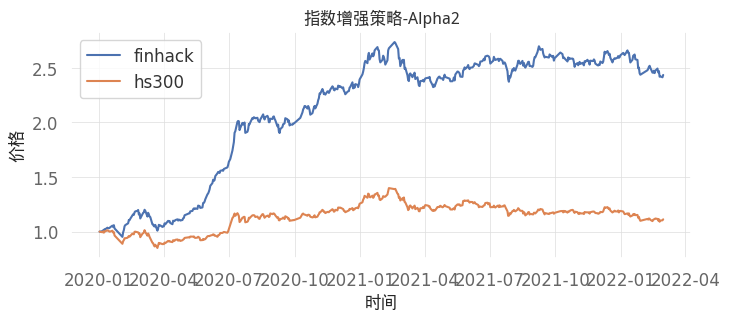

In [247]:
import akshare as ak
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
font_set = FontProperties(fname=r"/usr/share/fonts/truetype/wqy/wqy-microhei.ttc", size=12) 
plt.figure(dpi=100,figsize=(8,3))
plt.title(u"指数增强策略-Alpha2",fontproperties=font_set)
plt.xlabel(u"时间",fontproperties=font_set)
plt.ylabel(u"价格",fontproperties=font_set)

cum=report_normal_df['account']/100000000
benchcum=hs300['close']/4152.24
plt.plot(cum)
plt.plot(benchcum)
plt.legend([u'finhack','hs300'])
plt.show()

In [248]:
import empyrical as ey

returns=report_normal_df['return']
benchReturns=hs300['return']

alpha, beta = ey.alpha_beta(returns = returns, factor_returns = benchReturns, annualization=252)       
result = {}
result["alpha(阿尔法)"] = alpha
result["beta(贝塔)"] = beta
result['aggregate_returns(年度收益)']=ey.aggregate_returns(returns,convert_to='yearly')
result['annual_return(年化收益率)']=ey.annual_return(returns=returns, period='daily', annualization=252)
result['cagr(复合年均增长率)']=ey.cagr(returns)
result['annual_volatility(年化波动率)']=ey.annual_volatility(returns)
#result['info_ratio']=ey.information_ratio(returns =  returns, factor_returns = benchReturns)
result['info_ratio(信息比率)'] = ey.excess_sharpe(returns =  returns, factor_returns = benchReturns)
#result['cum_returns(累积收益)']=ey.cum_returns(returns)
result['downside_risk(下行风险)']=ey.downside_risk(returns)
result['R方'] =ey.stability_of_timeseries(returns)
result['sharpe(夏普比率)'] = ey.sharpe_ratio(returns = returns, risk_free=0, period='daily', annualization=None)
result['sortino(索提诺比率)'] = ey.sortino_ratio(returns = returns,required_return=0, period='daily', annualization=None, _downside_risk=None)
result['calmar(卡尔玛比率)'] = ey.calmar_ratio(returns = returns,period='daily', annualization=None)
result['omega(欧米伽比率)'] = ey.omega_ratio(returns = returns, risk_free=0.0, required_return=0.0, annualization=252)
result['max_down(最大回撤)']=ey.max_drawdown(returns)
for k,v in result.items():
    print(k+":"+str(v)+"\n")

alpha(阿尔法):0.5924871831864988

beta(贝塔):-0.9467432525147249

aggregate_returns(年度收益):datetime
2020    1.494838
2021    0.130103
2022   -0.065362
Name: return, dtype: float64

annual_return(年化收益率):0.5964180005055404

cagr(复合年均增长率):0.5964180005055404

annual_volatility(年化波动率):0.22480399592288472

info_ratio(信息比率):0.07911116537767503

downside_risk(下行风险):0.15108210817513162

R方:0.7454065386870743

sharpe(夏普比率):2.195291915586847

sortino(索提诺比率):3.2665045570390046

calmar(卡尔玛比率):3.7937035480375534

omega(欧米伽比率):1.4564751513557872

max_down(最大回撤):-0.1572126005507367



                           Strategy    Benchmark
-------------------------  ----------  -----------
Start Period               2020-01-02  2020-01-02
End Period                 2022-03-01  2022-03-01
Risk-Free Rate             0.0%        0.0%
Time in Market             100.0%      100.0%

Cumulative Return          163.51%     -10.28%
CAGR﹪                     56.56%      -4.89%

Sharpe                     2.2         -0.15
Smart Sharpe               2.12        -0.15
Sortino                    3.27        -0.23
Smart Sortino              3.15        -0.22
Sortino/√2                 2.31        -0.16
Smart Sortino/√2           2.23        -0.16
Omega                      1.46        1.46

Max Drawdown               -15.72%     -39.21%
Longest DD Days            201         707
Volatility (ann.)          22.48%      20.68%
R^2                        0.76        0.76
Calmar                     3.6         -0.12
Skew                       -0.54       0.83
Kurtosis                   3.02 

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2020-03-06,2020-03-23,2020-05-11,66,-15.721260,-14.034816
2,2021-02-19,2021-04-13,2021-09-08,201,-14.641592,-14.394513
3,2020-01-23,2020-02-03,2020-02-07,15,-10.100339,-6.172700
4,2021-09-09,2022-02-28,2022-03-01,173,-9.299347,-8.965692
5,2020-08-19,2020-09-10,2020-10-12,54,-8.026872,-7.325877


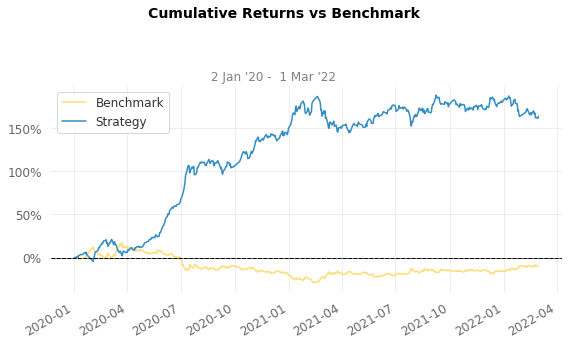

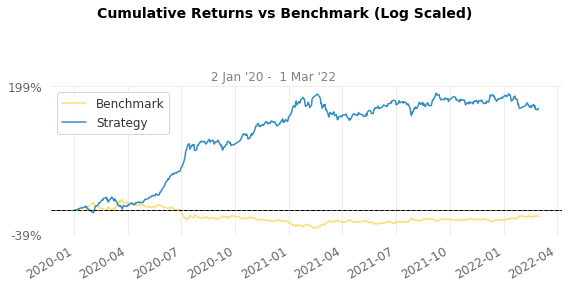

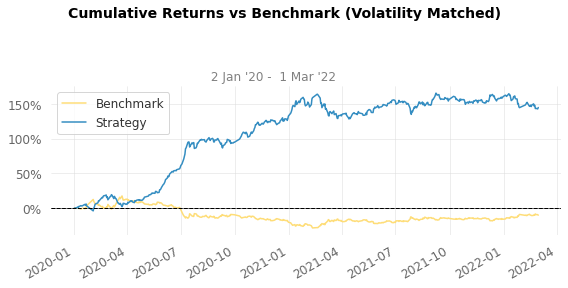

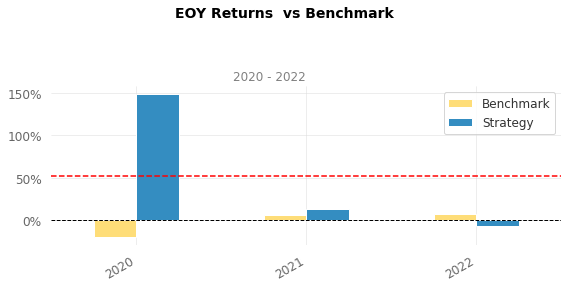

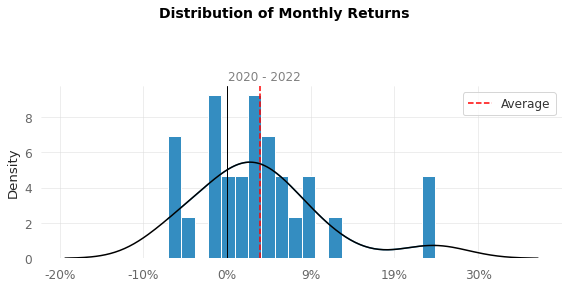

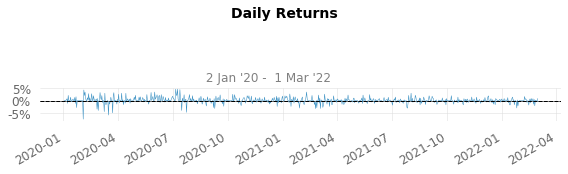

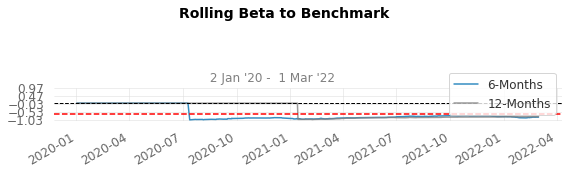

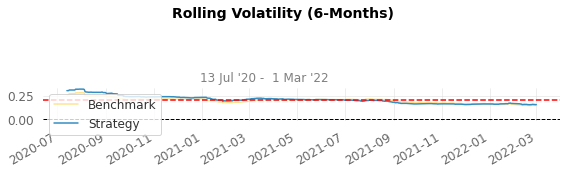

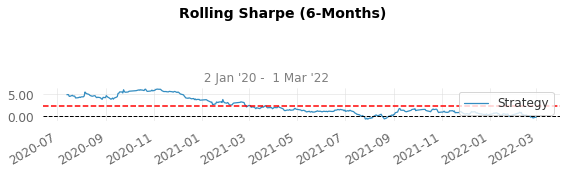

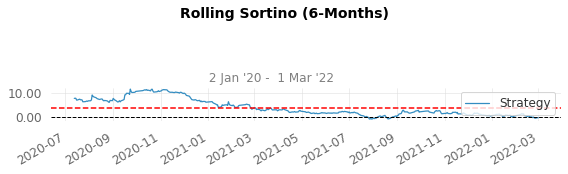

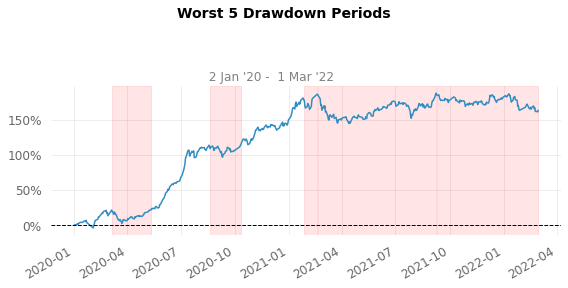

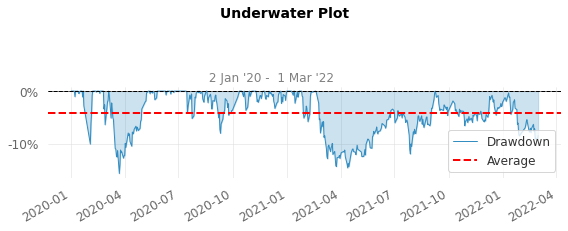

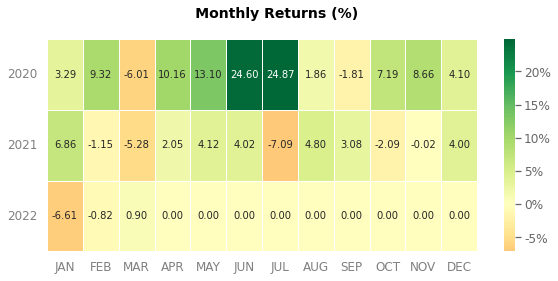

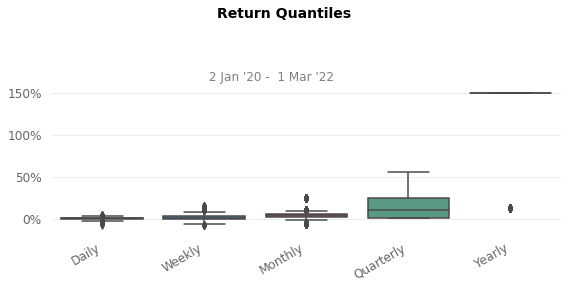

In [249]:
import quantstats as qs
qs.extend_pandas()
qs.reports.full(report_normal_df['return'], benchmark=hs300['return'])